# LAB - 6 : Write a program to implement the Kernel SVM Algorithm

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
# importing dataset
iris = datasets.load_iris()
print(iris)

# We'll use the petal length and width only for this analysis
X = iris.data[:, [2, 3]]
y = iris.target

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## Exploratory Data Analysis
###  Place the iris data into a pandas dataframe

In [63]:
iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns=iris.feature_names[2:])

# View the first 5 rows of the data
print(iris_df.head())

# Print the unique labels of the dataset
print('\n' + 'The unique labels in this data are ' + str(np.unique(y)))


   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

The unique labels in this data are [0 1 2]


## Splitting the dataset into the Training set and Test set

In [62]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=3)

# Printing the number of samples in the training and test sets
print('There are {} samples in the training set and {} samples in the test set'.format(
    X_train.shape[0], X_test.shape[0]))

There are 75 samples in the training set and 75 samples in the test set


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
sc = StandardScaler()

# Fit the StandardScaler to the training data
sc.fit(X_train)

# Transform the training and test data using the fitted scaler
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Print the standardized training data
print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())

   petal length (cm)  petal width (cm)
0           1.652618          1.302682
1           0.702837          1.578674
2           0.109225          0.060718
3          -0.009498          0.198714
4           0.287309          0.060718


## Plot the original Data

C:\Users\hrush\AppData\Local\Temp\ipykernel_4252\2893024445.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


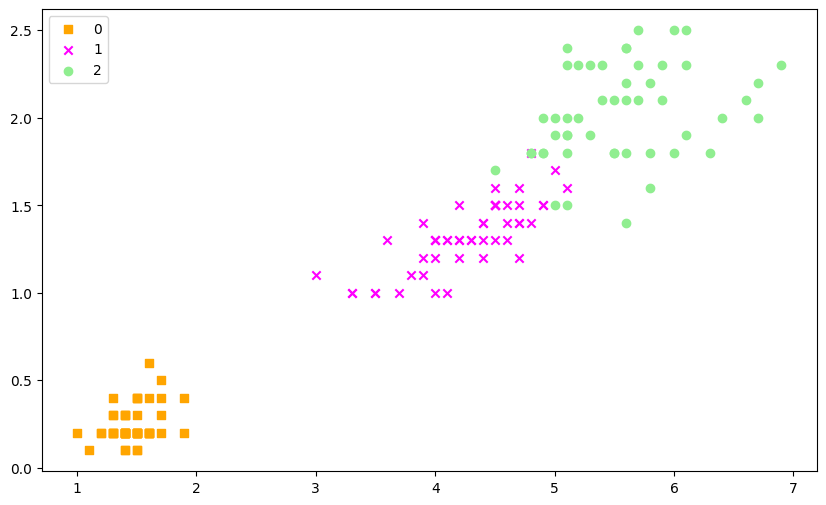

In [61]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Define markers and colors for the plot
markers = ('s', 'x', 'o')
colors = ('Orange', 'magenta', 'lightgreen')

# Create a colormap based on unique classes in y_test
cmap = ListedColormap(colors[:len(np.unique(y_test))])

# Plotting the data points for each class
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                c=cmap(idx), marker=markers[idx], label=cl)

# Adding legend
plt.legend()

# Display the plot
plt.show()

## Training the SVM model on the Training set

In [40]:
from sklearn.svm import SVC

svm = SVC(kernel='sigmoid', random_state = 3, gamma=.4)
svm.fit(X_train_std, y_train)

SVC(gamma=0.4, kernel='sigmoid', random_state=3)

### Dispplay the support Vectors of model

In [41]:
print("Support Vector for model are :", svm.support_vectors_)

Support Vector for model are : [[-1.19672322 -1.18124525]
 [-1.55289085 -1.45723713]
 [-1.67161339 -1.59523307]
 [-1.4341683  -1.59523307]
 [-1.49352958 -1.59523307]
 [-1.37480703 -0.90525337]
 [-1.55289085 -1.45723713]
 [ 0.28730855  0.06071821]
 [ 0.58411491  0.33671009]
 [ 0.16858601  0.33671009]
 [ 0.34666982  0.06071821]
 [ 0.28730855  0.19871415]
 [ 0.40603109  0.19871415]
 [ 0.34666982  0.47470603]
 [ 0.46539236  0.47470603]
 [ 0.46539236  0.19871415]
 [ 0.40603109  0.33671009]
 [ 0.34666982  0.33671009]
 [-0.24694289 -0.35326961]
 [ 0.04986347 -0.35326961]
 [-0.24694289 -0.35326961]
 [ 0.34666982  0.33671009]
 [-0.12822035 -0.35326961]
 [-0.36566543 -0.35326961]
 [ 0.70283745  0.33671009]
 [ 1.11836634  0.75069791]
 [ 0.58411491  1.02668979]
 [ 0.76219872  1.02668979]
 [ 0.64347618  0.88869385]
 [ 0.58411491  0.75069791]
 [ 0.70283745  0.75069791]
 [ 0.70283745  1.02668979]
 [ 1.11836634  0.47470603]
 [ 0.64347618  0.33671009]
 [ 0.52475363  0.75069791]
 [ 0.34666982  0.6127019

In [50]:
# Printing the number of support vectors for each class
print("Number of support vectors of class 0: ", svm.n_support_[0])
print("Number of support vectors of class 1: ", svm.n_support_[1])
print("Number of support vectors of class 2: ", svm.n_support_[2])

Number of support vectors of class 0:  7
Number of support vectors of class 1:  17
Number of support vectors of class 2:  12


In [51]:
# Printing Indices for support vectors
print("Indices for support vectors are : ", svm.support_)

Indices for support vectors are :  [ 5  6 15 20 46 51 63  4  9 11 16 17 23 25 32 34 39 41 48 54 62 64 65 67
 14 29 33 38 42 49 55 57 61 68 69 74]


## Finding Accuracy of model on Test and Train Set

In [57]:
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.99 out of 1
The accuracy of the svm classifier on test data is 0.96 out of 1


## Finding Accuracy of model on using confiusion matrix

In [58]:
from sklearn import metrics  # Add this import statement

# Assuming 'svm' is your trained Support Vector Machine model
confusion_matrix = metrics.confusion_matrix(y_test, svm.predict(X_test_std))
print(confusion_matrix)

[[29  0  0]
 [ 0 20  3]
 [ 0  0 23]]


In [59]:
from sklearn import metrics  # Import the metrics module

# Calculate accuracy
Accuracy = metrics.accuracy_score(y_test, svm.predict(X_test_std))

# Calculate precision
Precision = metrics.precision_score(y_test, svm.predict(X_test_std), average='macro')

# Calculate sensitivity/recall
Sensitivity_recall = metrics.recall_score(y_test, svm.predict(X_test_std), average='macro')

# Calculate specificity
Specificity = metrics.recall_score(y_test, svm.predict(X_test_std), pos_label=0, average='macro')

# Calculate F1 score
F1_score = metrics.f1_score(y_test, svm.predict(X_test_std), average='macro')

C:\Users\hrush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [60]:
# Printing the evaluation metrics in a dictionary format
print({
    "Accuracy": Accuracy,
    "Precision": Precision,
    "Sensitivity_recall": Sensitivity_recall,
    "Specificity": Specificity,
    "F1_score": F1_score
}, end="")

{'Accuracy': 0.96, 'Precision': 0.9615384615384616, 'Sensitivity_recall': 0.9565217391304347, 'Specificity': 0.9565217391304347, 'F1_score': 0.9563360227812056}